In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
trains = pd.read_csv('d:/dataset/train.csv')

In [7]:
trains.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#look for missing data

trains.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

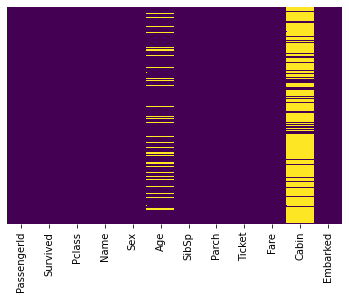

In [9]:
#heat map to check missing data

sns.heatmap(trains.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#preferred style

sns.set_style('whitegrid')

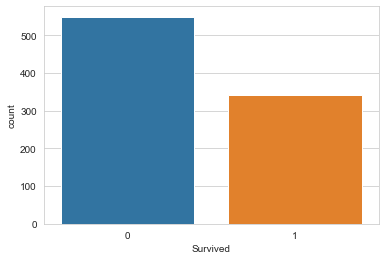

In [11]:
#count who survived and who didnt

sns.countplot(x='Survived',data=trains)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

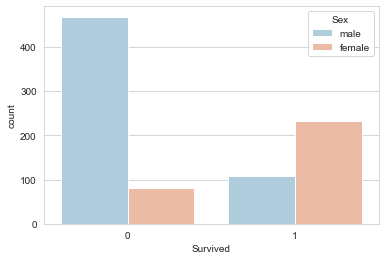

In [12]:
#based on gender

sns.countplot(x='Survived',hue='Sex',data=trains,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

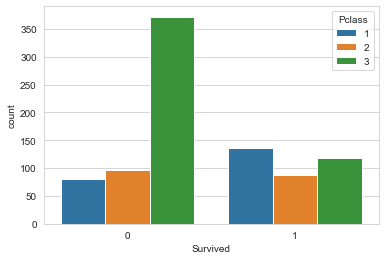

In [13]:
#based on class

sns.countplot(x='Survived',hue='Pclass',data=trains)

<AxesSubplot:xlabel='Age'>

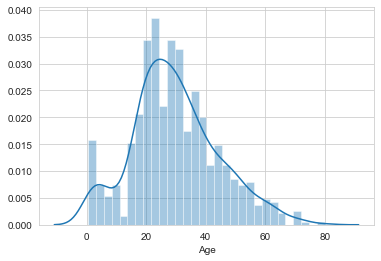

In [14]:
#age

sns.distplot(trains['Age'].dropna(),bins=30)

In [15]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
trains.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='SibSp', ylabel='count'>

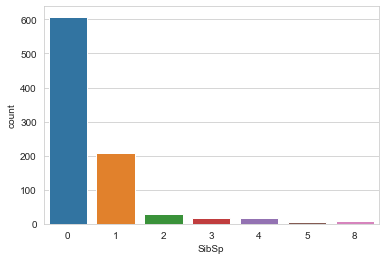

In [17]:
#SibSp = siblings, spouse, parents

sns.countplot(x='SibSp',data=trains)

<AxesSubplot:>

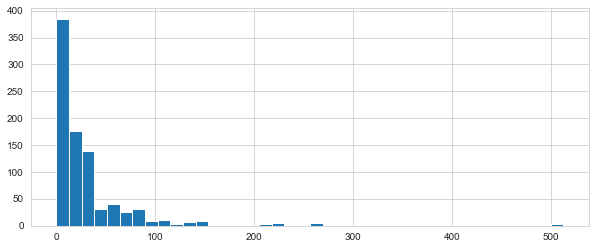

In [18]:
trains['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

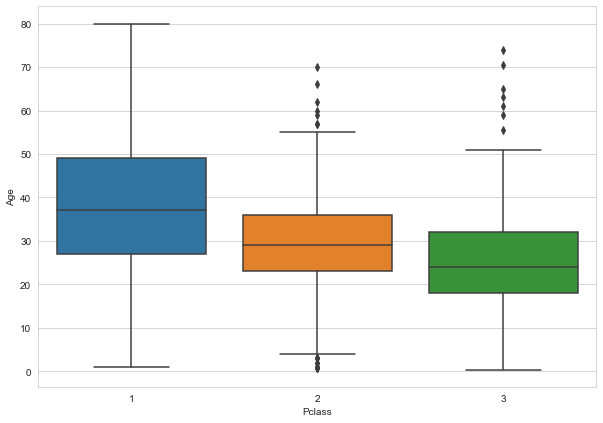

In [19]:
#fill the missing age data = imputation

#plot

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=trains)

In [20]:
#function to impute the age

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
#apply the impute age function to the dataframe

trains['Age'] = trains[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

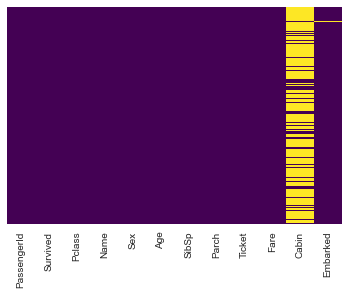

In [22]:
sns.heatmap(trains.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
trains.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
trains.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
#converting categorical variables into dummy variable

pd.get_dummies(trains['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
Sex = pd.get_dummies(trains['Sex'],drop_first=True)

In [27]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
trains.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
#dummy/indicator variable for 'embarked'

embark = pd.get_dummies(trains['Embarked'],drop_first=True)

In [30]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
#drop the columns not required
trains.drop(['Sex','Embarked','Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [32]:
trains

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [33]:
X = trains.drop('Survived',axis=1)
y = trains['Survived']

In [34]:
X

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,24.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
#model building; steps
#split the data into train test and split

from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30)

In [38]:
#import algorithm: logisticRegression for classification 

from sklearn.linear_model import LogisticRegression

In [39]:
#initialize the model

Psurvival = LogisticRegression()

#train the model

Psurvival.fit(X_train,y_train)

C:\Users\abdul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#test the model 

Y_hat = Psurvival.predict(X_test)

In [41]:
#metrics for classification 

from sklearn.metrics import classification_report
print (classification_report(y_test,Y_hat))   #(actual,predicted)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       155
           1       0.70      0.40      0.51       113

    accuracy                           0.68       268
   macro avg       0.68      0.64      0.63       268
weighted avg       0.68      0.68      0.65       268



In [42]:
#confusion matrix

from sklearn.metrics import confusion_matrix

print (confusion_matrix(y_test,Y_hat))

[[136  19]
 [ 68  45]]


In [43]:
 Psurvival.predict([[2,30,1,0,9]])

array([0], dtype=int64)